In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
# this cell will take a minute to run depending on your internet connection
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X shape: (70000, 784) y shape: (70000,)


In [3]:
# this cell processes some of the data
#y = np.array(y) #need this

digits = {j:[] for j in range(10)}
for j in range(len(y)): # takes data assigns it into a dictionary
    #digits[int(y[j])].append(X[j].reshape(28,28))
    #added the following 3 lines cause the above line wouldnt work
    current_y = int(y.iloc[j])
    current_X = np.array(X.iloc[j]).reshape(28,28)
    digits[current_y].append(current_X)

digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be one numpy array
for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape )

Shape of data with label 0 : (6903, 28, 28)
Shape of data with label 1 : (7877, 28, 28)
Shape of data with label 2 : (6990, 28, 28)
Shape of data with label 3 : (7141, 28, 28)
Shape of data with label 4 : (6824, 28, 28)
Shape of data with label 5 : (6313, 28, 28)
Shape of data with label 6 : (6876, 28, 28)
Shape of data with label 7 : (7293, 28, 28)
Shape of data with label 8 : (6825, 28, 28)
Shape of data with label 9 : (6958, 28, 28)


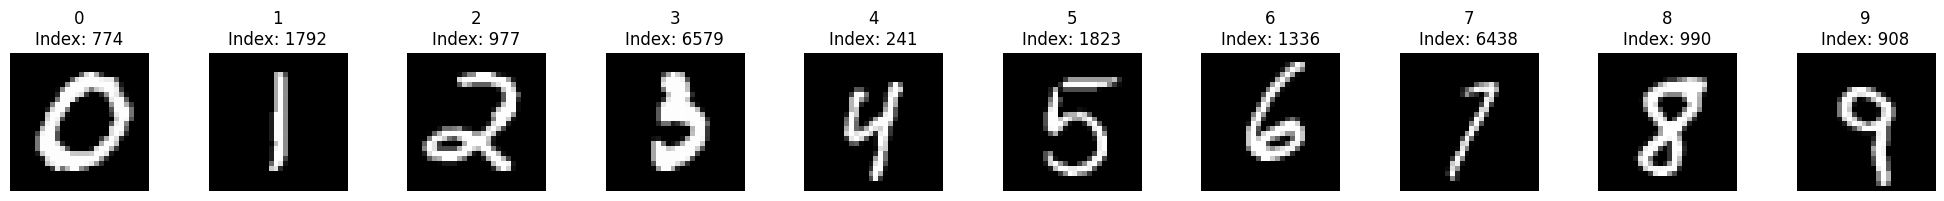

In [4]:
# plot data here (this should have an output)
fig, axarr = plt.subplots(1, 10, figsize=(20, 2))

random_indices = {}
for j in range(10):
    idx = np.random.randint(digits[j].shape[0])
    axarr[j].imshow(digits[j][idx], cmap='gray')
    axarr[j].axis('off')
    axarr[j].set_title(str(j) + "\nIndex: " + str(idx))
    random_indices[j] = idx

plt.tight_layout()
plt.show()

In [12]:
def compute_gradient(w, X, y):
    """
    Compute the gradient of the logistic regression objective.
    """
    N = X.shape[0]
    z = y * np.dot(X, w)
    dz = -y / (1 + np.exp(z))
    grad = np.dot(dz, X) / N
    return grad

def backtracking_line_search(w, X, y, grad, mu=1e-1, gamma=0.5, beta=0.8):
    """
    Perform backtracking line search to find the appropriate step size.
    """
    while True:
        w_new = w - mu * grad
        if np.mean(np.log(1 + np.exp(-y * np.dot(X, w_new)))) <= \
           np.mean(np.log(1 + np.exp(-y * np.dot(X, w)))) - gamma * mu * np.linalg.norm(grad)**2:
            break
        mu *= beta
    return mu

def logistic_regression_with_backtracking(X, y, T=10000, mu=1e-1, gamma=0.5, beta=0.8):
    """
    Perform logistic regression using gradient descent with backtracking line search.
    """
    w = np.zeros(X.shape[1])
    F_values = []

    for t in range(T):
        grad = compute_gradient(w, X, y)

        # Backtracking line search for step size
        mu_t = backtracking_line_search(w, X, y, grad, mu, gamma, beta)
        
        # Update rule
        w = w - mu_t * grad

        # Calculate and store the current value of F(w)
        F_value = np.mean(np.log(1 + np.exp(-y * np.dot(X, w))))
        F_values.append(F_value)

    return w, F_values

/var/folders/05/m_6lt_yj3pd83q_t76drfzpw0000gn/T/ipykernel_35276/2350589576.py:17: RuntimeWarning: overflow encountered in exp
  if np.mean(np.log(1 + np.exp(-y * np.dot(X, w_new)))) <= \


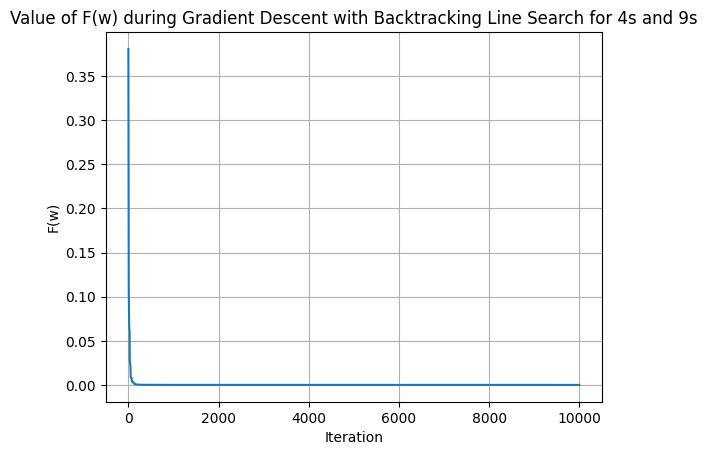

In [13]:
# Classification function
def classify(w, X):
    return np.sign(np.dot(X, w))

# Selecting the first 500 examples of 4’s and 9’s for training
X_train_4 = digits[4][:500].reshape(500, 784)
X_train_9 = digits[9][:500].reshape(500, 784)

y_train_4 = np.full(500, -1)  # We'll use -1 for 4s
y_train_9 = np.full(500, 1)   # We'll use 1 for 9s

# Combining the training data and labels
X_train_49 = np.vstack([X_train_4, X_train_9])
y_train_49 = np.hstack([y_train_4, y_train_9])

# Running gradient descent with backtracking line search
w_opt_backtracking, F_values_backtracking = logistic_regression_with_backtracking(X_train_49, y_train_49)

# Plotting the value of F(w) at each iteration
plt.plot(F_values_backtracking)
plt.xlabel('Iteration')
plt.ylabel('F(w)')
plt.title('Value of F(w) during Gradient Descent with Backtracking Line Search for 4s and 9s')
plt.grid(True)
plt.show()
